In [1]:
!date

Wed Apr 27 08:56:01 MDT 2016


In [2]:
# http://matpalm.com/blog/2012/12/27/dead_simple_pymc/

In [3]:
# simple_normal_model.py
import pymc
import numpy as np
import spacepy.plot as plt
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline


This unreleased version of SpacePy is not supported by the SpacePy team.


/Users/blarsen/miniconda3/envs/python3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


(array([  4.,   6.,  10.,  14.,  18.,  20.,  16.,   6.,   4.,   2.]),
 array([  4.46652628,   5.58870138,   6.71087647,   7.83305157,
          8.95522667,  10.07740177,  11.19957686,  12.32175196,
         13.44392706,  14.56610216,  15.68827725]),
 <a list of 10 Patch objects>)

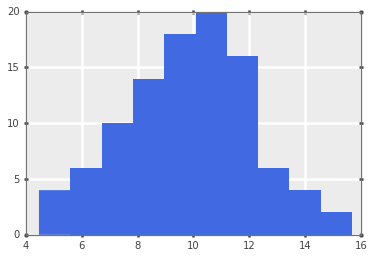

In [4]:
data = np.random.normal(loc=10, scale=2.0, size=100)
plt.hist(data, 10)

In [5]:
mean = pymc.Uniform('mean', lower=min(data), upper=max(data))
precision = pymc.Uniform('precision', lower=0.0001, upper=1.0)
process = pymc.Normal('process', mu=mean, tau=precision, value=data, observed=True)

 [-----------------100%-----------------] 50000 of 50000 complete in 4.5 secPlotting precision
Plotting mean


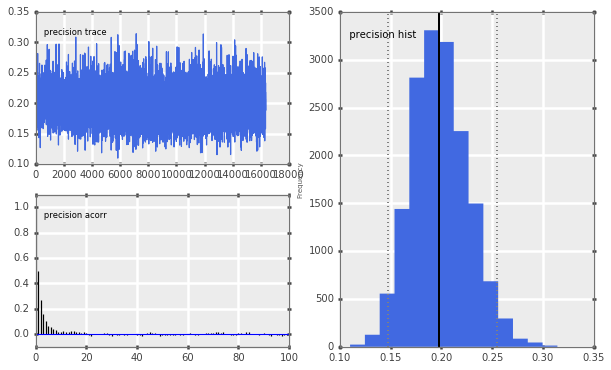

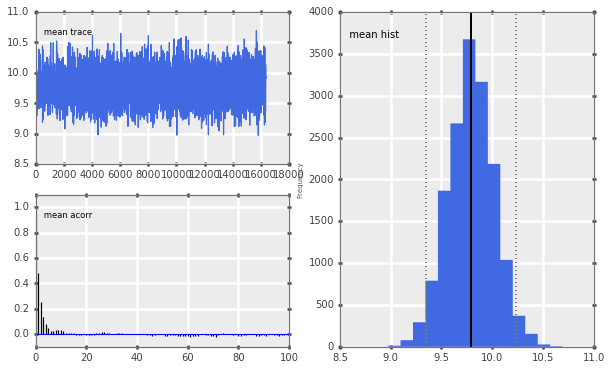

In [6]:
model = pymc.MCMC([mean, precision, process])
model.sample(iter=5e4, burn=1e3, thin=3)
pymc.Matplot.plot(model)

In [7]:
pprint(model.stats())

{'mean': {'95% HPD interval': array([  9.34750217,  10.23967749]),
          'mc error': 0.0031013513535000274,
          'mean': 9.7937735268692805,
          'n': 16333,
          'quantiles': {2.5: 9.3481923762382131,
                        25: 9.6396551948514961,
                        50: 9.7939290597415649,
                        75: 9.9457148938509441,
                        97.5: 10.242674525738165},
          'standard deviation': 0.22646075472623806},
 'precision': {'95% HPD interval': array([ 0.14735617,  0.25433749]),
               'mc error': 0.00045739371394829832,
               'mean': 0.19865541476720347,
               'n': 16333,
               'quantiles': {2.5: 0.14836872799442127,
                             25: 0.17897002956723959,
                             50: 0.19715173624530105,
                             75: 0.21635217516099439,
                             97.5: 0.25732997816384023},
               'standard deviation': 0.027958147485120013}}


/Users/blarsen/miniconda3/envs/python3/lib/python3.4/site-packages/numpy/core/fromnumeric.py:1157: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/Users/blarsen/miniconda3/envs/python3/lib/python3.4/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [8]:
 
mean = pymc.Uniform('mean', lower=min(data), upper=max(data))
std_dev = pymc.Uniform('std_dev', lower=0, upper=50)
 
@pymc.deterministic(plot=False)
def precision(std_dev=std_dev):
    return 1.0 / (std_dev * std_dev)
 
process = pymc.Normal('process', mu=mean, tau=precision, value=data, observed=True)



 [-----------------100%-----------------] 50000 of 50000 complete in 6.6 secPlotting std_dev
Plotting mean


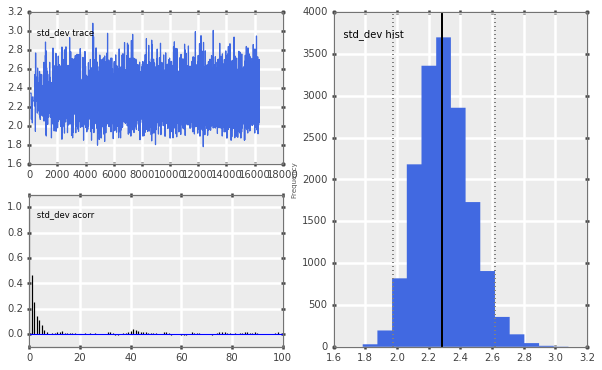

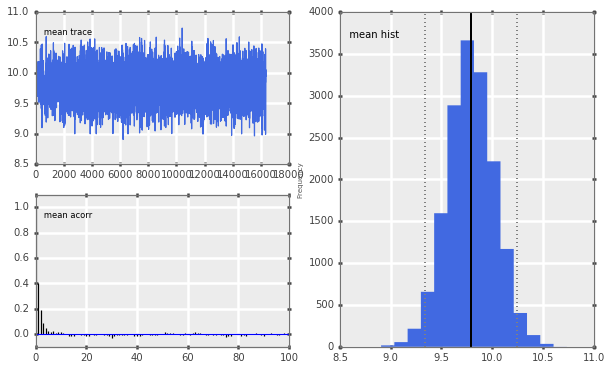

In [9]:
model = pymc.MCMC([mean, std_dev, process])
model.sample(iter=5e4, burn=1e3, thin=3)
pymc.Matplot.plot(model)